In [4]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
clean_df = pd.read_csv('clean_resume_data.csv')

In [9]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [11]:
clean_df.shape

(2484, 3)

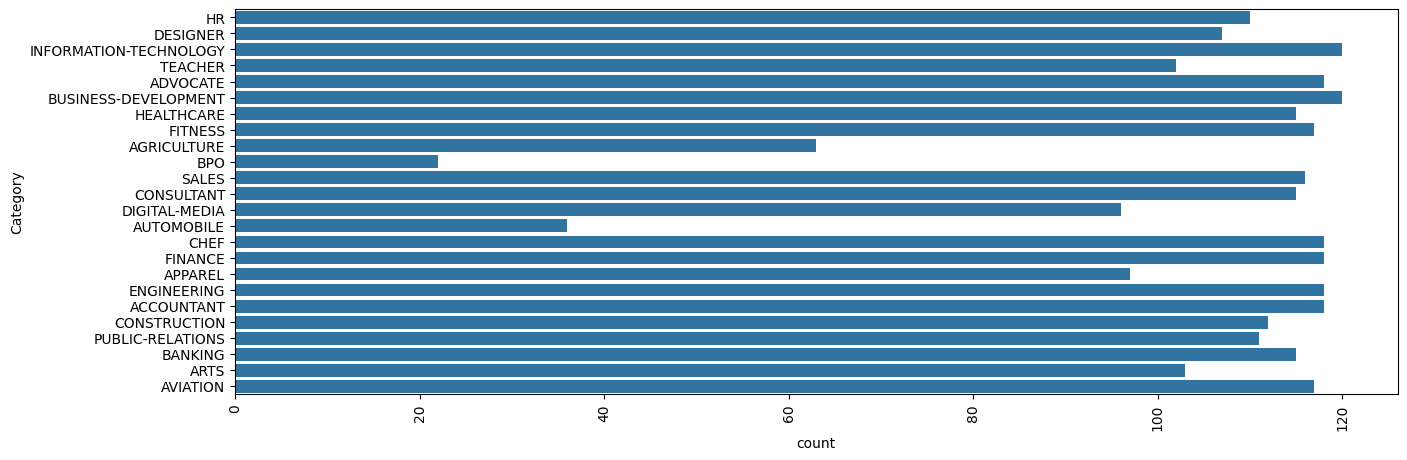

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

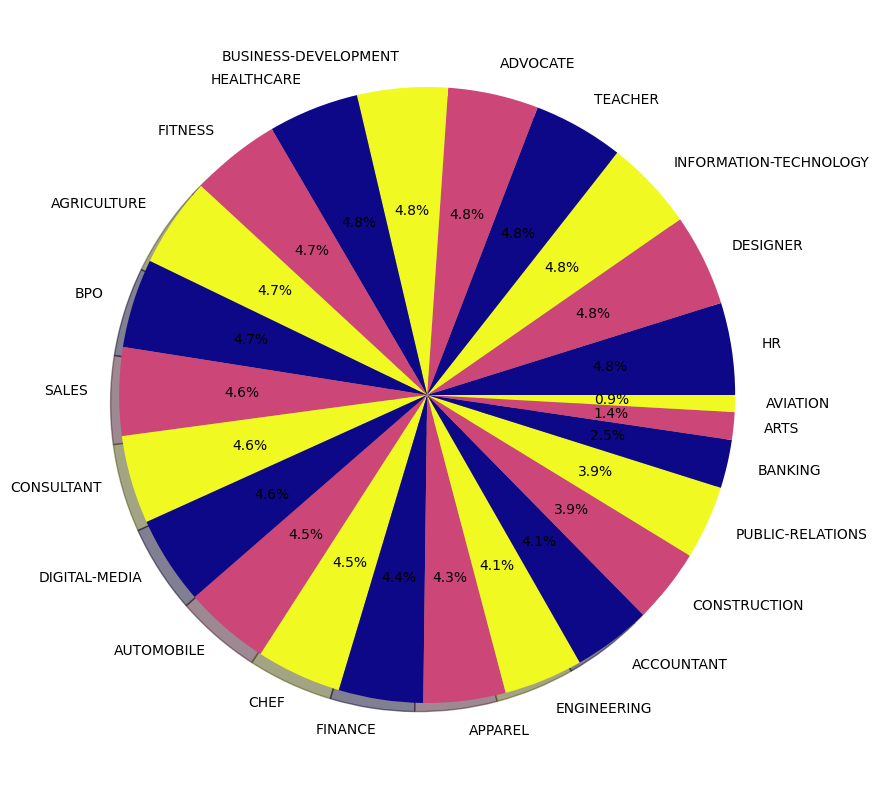

In [19]:
counts= clean_df ['Category'].value_counts()

labels =clean_df ['Category'].unique()

plt.figure(figsize=(15,10))

plt.pie(counts,labels = labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.plasma (np.linspace(0,1,3)))

plt.show()

BALANCE DATASET

In [27]:
from sklearn.utils import resample

# Define the maximum count among all categories

max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count

balanced_data = []

for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
         #Perform oversampling for categories with fewer samples
         balanced_category_data = resample (category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)
# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [28]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [29]:
balanced_df.dropna(inplace=True)

TRAIN TEST SPLIT




In [30]:
X = balanced_df['Feature']

y = balanced_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_tfidf, y_train)

#Step 4: Accuracy Evaluation

y_pred = rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8420138888888888


In [35]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.95      0.89        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.95      0.83      0.88        23
               APPAREL       0.90      0.90      0.90        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      0.97      0.94        30
               BANKING       1.00      0.74      0.85        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.48      0.67      0.56        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.95      0.61      0.75        31
              DESIGNER       0.96      0.82      0.88        28
         DIGITAL-MEDIA       0.90      

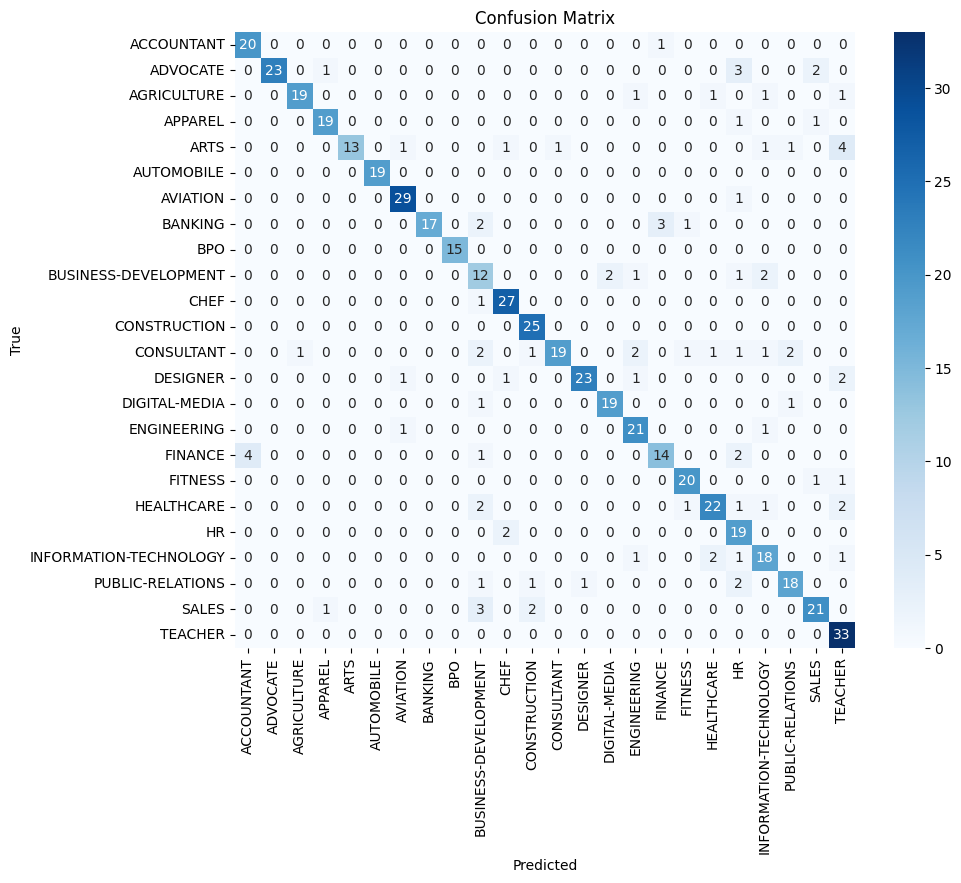

In [39]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =rf_classifier.classes_, yticklabels=rf_classifier.classes_)

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()

In [47]:
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s*', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+', '', cleanText)
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText



# Prediction and Category Name
def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [48]:
# Example Usage with multiple resumes

resumes = [
    """hr assistant summary hard worker dedicated detailed oriented experienced organized highly motivated many attributes""",
    
    """software engineer proficient in python java machine learning data analysis problem solving team collaboration and cloud technologies""",
    
    """digital marketing specialist skilled in seo content creation social media management email campaigns brand promotion and customer engagement"""
]

for i, resume_text in enumerate(resumes, 1):
    predicted_category = predict_category(resume_text)
    print(f"Resume {i} -> Predicted Category: {predicted_category}")


Resume 1 -> Predicted Category: HR
Resume 2 -> Predicted Category: ENGINEERING
Resume 3 -> Predicted Category: DIGITAL-MEDIA


In [50]:
import os
import pickle

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save models
pickle.dump(rf_classifier, open('models/rf_classifier_categorization.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('models/tfidf_vectorizer_categorization.pkl', 'wb'))


In [51]:
import pickle

pickle.dump(rf_classifier, open('models/rf_classifier_categorization.pkl','wb'))

pickle.dump(tfidf_vectorizer, open('models/tfidf_vectorizer_categorization.pkl','wb'))